In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.optimize import curve_fit

In [2]:
import netrc
info = netrc.netrc()

In [3]:
n_min = 10
n_max = 10
fit_ran = 50

In [4]:
g_en5 = -7.711545013271975

In [5]:
gate_ct = np.array([46, 88, 130, 172, 214, 256, 298, 340, 382, 424], dtype = int)

In [6]:
base = 1
expo = 3

In [7]:
eps = base*(10**(-expo))

In [8]:
p_err = 1 - (1-eps)**gate_ct

In [9]:
p_err

array([0.04498002, 0.08427944, 0.12196168, 0.15809328, 0.19273805,
       0.22595718, 0.25780933, 0.28835075, 0.31763538, 0.34571493])

In [10]:
exp_off = (1-p_err)

In [11]:
depp = np.arange(1, 11, 1, dtype = int)

In [12]:
#find subset to max/e^2
def find_subset(array, targ_val, numm):
    threshold = targ_val / np.exp(numm)
    subset = []
    last_index = 0
    for i, elem in enumerate(array):
        if elem >= threshold:
            subset.append(elem)
            last_index = i
        else:
            break
    return subset, last_index

#### import noiseless data

In [13]:
nseeds = 10

In [14]:
with open('noiseless_COBY_rand_runs.pkl', 'rb') as file:
    yruns = pickle.load(file)

In [15]:
with open('noiseless_COBY_rand_list.pkl', 'rb') as file:
    ylist = pickle.load(file)

In [16]:
res_data_mean = []
res_data_std = []
val_list = []

In [17]:
for gt in depp:
    yran = np.array(yruns['%s'%gt])
    ylis = np.array(ylist['%s'%gt])
    # Compute mean and standard deviation across runs
    mean_y = np.mean(yran, axis=0)
    std_y = np.std(yran, axis=0)
    val = np.mean(ylis, axis=0)
    res_data_mean.append(mean_y)
    res_data_std.append(std_y)
    val_list.append(val)

In [18]:
def extract_data(dep_list):
    res_data = []
    val_list = []
    for it in dep_list:
        with open('global_noisy/noisy-%s_%s.pkl'%(base, expo), 'rb') as file:
            ydata = pickle.load(file)
            res_data.append(eval(ydata[it-1].meta_data['optimization_trace']))
            val_list.append(ydata[it-1].value)
    return([res_data, val_list])

In [19]:
res_data_no, val_list_no = extract_data(depp)

In [20]:
xx = np.arange(0, 25000, 1, dtype = int)

### offset between noiseless and noisy data

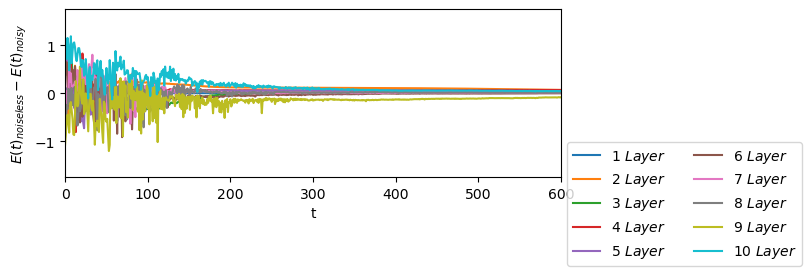

In [30]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
for gt in depp:
    diff = np.multiply(exp_off[gt-1], np.array(res_data_mean[gt-1][0:len(res_data_no[gt-1])]))- np.array(res_data_no[gt-1])
    ax.plot(diff, label = r'$%s~Layer$' %(gt))
ax.set_xlabel('t')
ax.set_ylabel(r'$ E(t)_{noiseless}- E(t)_{noisy}$')
ax.legend(ncol = 2, bbox_to_anchor = (1.5, 0.25))
plt.axis([0, 600, -1.75, 1.75])
#ax.set_yscale('log')
plt.show()

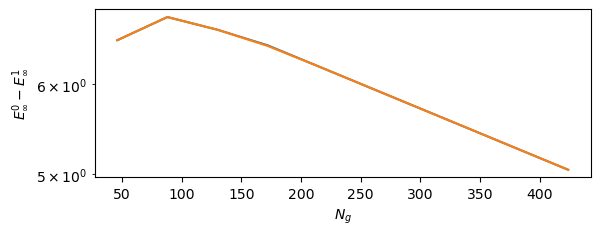

In [22]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.plot(gate_ct, -np.array(val_list_no))
ax.plot(gate_ct, -np.multiply(exp_off, np.array(val_list)))
#ax.plot(exp_off)
#ax.plot(diff)
ax.set_xlabel(r'$N_g$')
ax.set_ylabel(r'$ E_{\infty}^0- E_{\infty}^1$')
#ax.legend(ncol = 2, bbox_to_anchor = (1.5, 0.25))
#plt.axis([0, 600, -1.75, 1.75])
ax.set_yscale('log')
plt.show()